In [1]:
from datascience import *
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')
import warnings
warnings.simplefilter(action='ignore',category=np.VisibleDeprecationWarning)

## Lecture 10 ##

## Prediction ##

In [2]:
families = Table.read_table('family_heights.csv')
families

family,father,mother,midparentHeight,children,childNum,sex,childHeight
1,78.5,67,75.43,4,1,male,73.2
1,78.5,67,75.43,4,2,female,69.2
1,78.5,67,75.43,4,3,female,69
1,78.5,67,75.43,4,4,female,69
2,75.5,66.5,73.66,4,1,male,73.5
2,75.5,66.5,73.66,4,2,male,72.5
2,75.5,66.5,73.66,4,3,female,65.5
2,75.5,66.5,73.66,4,4,female,65.5
3,75,64,72.06,2,1,male,71
3,75,64,72.06,2,2,female,68


In [3]:
parent_avgs = (families.column('father') + families.column('mother'))/2

In [4]:
heights = Table().with_columns(
    'Parent Average', parent_avgs,
    'Child', families.column('childHeight'),
    'Sex', families.column('sex')
)
heights

Parent Average,Child,Sex
72.75,73.2,male
72.75,69.2,female
72.75,69,female
72.75,69,female
71,73.5,male
71,72.5,male
71,65.5,female
71,65.5,female
69.5,71,male
69.5,68,female


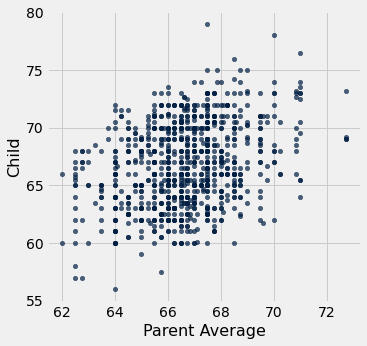

In [5]:
heights.scatter('Parent Average', 'Child')

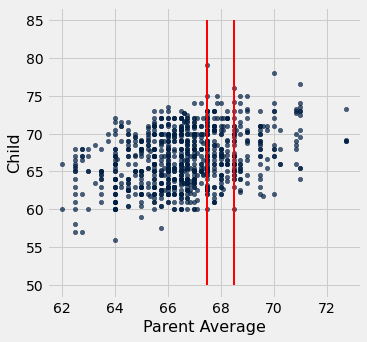

In [6]:
heights.scatter('Parent Average', 'Child')
plots.plot([67.5, 67.5], [50, 85], color='red', lw=2)
plots.plot([68.5, 68.5], [50, 85], color='red', lw=2);

In [7]:
nearby = heights.where('Parent Average', are.between(67.5, 68.5))
nearby_mean = np.average(nearby.column('Child'))
nearby_mean

67.620000000000005

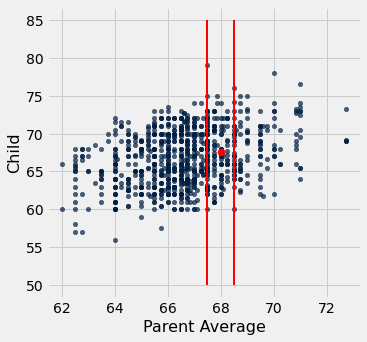

In [8]:
heights.scatter('Parent Average', 'Child')
plots.plot([67.5, 67.5], [50, 85], color='red', lw=2)
plots.plot([68.5, 68.5], [50, 85], color='red', lw=2)
plots.scatter(68, nearby_mean, color='red', s=50);

In [9]:
def predict(h):
    nearby = heights.where('Parent Average', are.between(h - 1/2, h + 1/2))
    return np.average(nearby.column('Child'))

In [10]:
predict(68)

67.620000000000005

In [11]:
predict(70)

68.561904761904756

In [12]:
predict(73)

70.099999999999994

In [ ]:
predicted_heights = heights.apply(predict, 'Parent Average')
predicted_heights

In [ ]:
heights = heights.with_column('Prediction', predicted_heights)

In [ ]:
heights.select('Parent Average', 'Child', 'Prediction').scatter('Parent Average')

## Prediction Accuracy ##

In [ ]:
def difference(x, y):
    return x - y

In [ ]:
pred_errs = heights.apply(difference, 'Prediction', 'Child')
pred_errs

In [ ]:
heights = heights.with_column('errors',pred_errs)
heights

In [ ]:
heights.hist('errors')

In [ ]:
heights.hist('errors', group='Sex')

# Discussion Question

In [ ]:
def predict_smarter(h, g):
    nearby = heights.where('Parent Average', are.between(h - 1/2, h + 1/2))
    nearby_same_sex = nearby.where('Sex', g)
    return np.average(nearby_same_sex.column('Child'))

In [ ]:
predict_smarter(68, 'female')

In [ ]:
predict_smarter(68, 'male')

In [ ]:
smarter_predicted_heights = heights.apply(predict_smarter, 'Parent Average', 'Sex')
heights = heights.with_column('Smarter Prediction', smarter_predicted_heights)

In [ ]:
smarter_pred_errs = heights.apply(difference, 'Child', 'Smarter Prediction')
heights = heights.with_column('Smarter Errors', smarter_pred_errs)

In [ ]:
heights.hist('Smarter Errors', group='Sex')

## Grouping by One Column ##

In [ ]:
cones = Table.read_table('cones.csv')

In [ ]:
cones

In [ ]:
cones.group('Flavor')

In [ ]:
cones.drop('Color').group('Flavor', np.average)

In [ ]:
cones.drop('Color').group('Flavor', min)

## Grouping By One Column: Welcome Survey ##

In [ ]:
survey = Table.read_table('welcome_survey_fa21.csv')

In [ ]:
by_extra = survey.group('Extraversion', np.average)
by_extra

In [ ]:
by_extra.select('Extraversion', 'Number of textees average').plot('Extraversion')

In [ ]:
by_extra.select('Extraversion', 'Hours of sleep average').plot('Extraversion')

In [ ]:
survey.group('Extraversion')

## Lists

In [ ]:
[1, 5, 'hello', 5.0]

In [ ]:
[1, 5, 'hello', 5.0, make_array(1,2,3)]

## Grouping by Two Columns ##

![Do right-handed people tend to sleep on their left side and left-handed people sleep on their right?](handed.png)

In [ ]:
survey.group(['Handedness','Sleep position']).show()

## Pivot Tables

In [ ]:
survey.pivot('Sleep position', 'Handedness')

In [ ]:
survey.pivot('Sleep position', 'Handedness', values='Extraversion', collect=np.average)

In [ ]:
survey.group('Handedness', np.average)

## Group vs Pivot

Need help with group vs pivot?  Try [our visualizer](http://data8.org/interactive_table_functions/).